In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('mtsamples.csv')

# Info on Dataset
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns)

Dataset shape: (4999, 6)

Column names: Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')


In [2]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64


In [3]:
df

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...,...
4994,4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [4]:
# Number of unique classes
print("Number of unique specialties (classes):", df['medical_specialty'].nunique())

Number of unique specialties (classes): 40


In [5]:
# Check class distribution
print("Top 10 most common specialties:")
df['medical_specialty'].value_counts().head(10)

Top 10 most common specialties:


medical_specialty
Surgery                          1103
Consult - History and Phy.        516
Cardiovascular / Pulmonary        372
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  230
Neurology                         223
SOAP / Chart / Progress Notes     166
Obstetrics / Gynecology           160
Name: count, dtype: int64

In [6]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import re
import nltk
import string
from nltk.corpus import stopwords

# Only once:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\692364\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\692364\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Data Cleaning

In [8]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\692364\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""

    # Lowercase
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join back into a string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


In [10]:
# Remove rows with missing transcription
df = df.dropna(subset=['transcription'])

# Clean transcription column
df['clean_transcription'] = df['transcription'].apply(clean_text)

# Preview
df[['medical_specialty', 'clean_transcription']].head(10)

C:\Users\692364\AppData\Local\Temp\ipykernel_12072\3929243770.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_transcription'] = df['transcription'].apply(clean_text)


,medical_specialty,clean_transcription
0,Allergy / Immunology,subjective yearold white female presents compl...
1,Bariatrics,past medical history difficulty climbing stair...
2,Bariatrics,history present illness seen abc today pleasan...
3,Cardiovascular / Pulmonary,mmode left atrial enlargement left atrial diam...
4,Cardiovascular / Pulmonary,left ventricular cavity size wall thickness ap...
5,Bariatrics,preoperative diagnosis morbid obesitypostopera...
6,Bariatrics,preoperative diagnoses deformity right breast ...
7,Cardiovascular / Pulmonary,echocardiogrammultiple views heart great vesse...
8,Bariatrics,preoperative diagnosis lipodystrophy abdomen t...
9,Cardiovascular / Pulmonary,description normal cardiac chambers size norma...


## Exploratory Data Analysis (EDA)

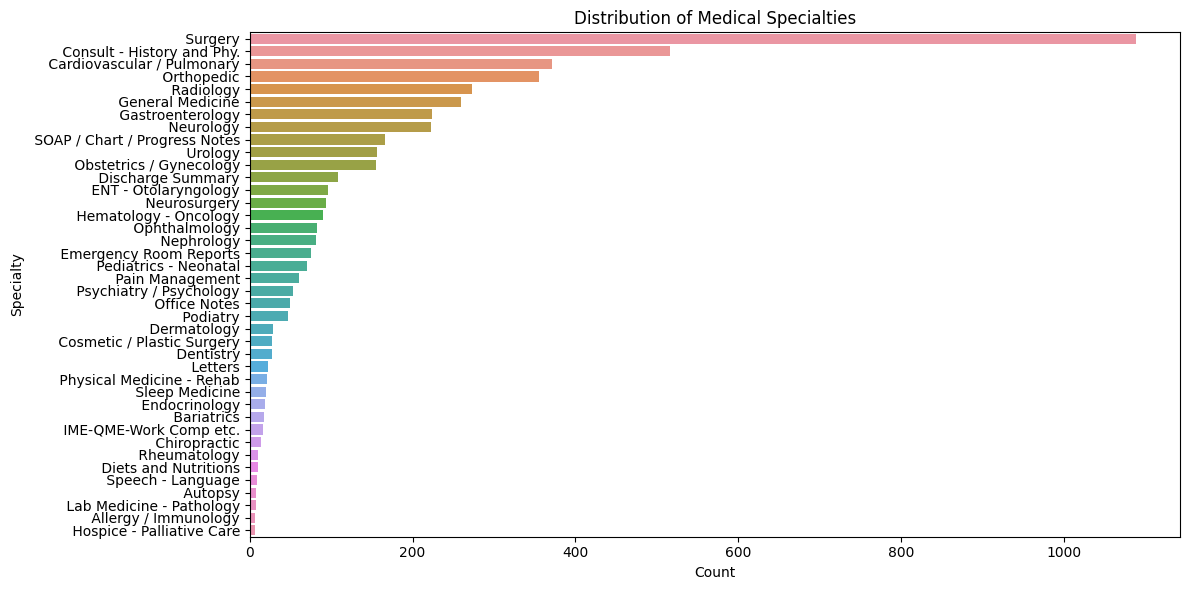

In [11]:
# Class Distribution Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, y='medical_specialty', order=df['medical_specialty'].value_counts().index)
plt.title("Distribution of Medical Specialties")
plt.xlabel("Count")
plt.ylabel("Specialty")
plt.tight_layout()
plt.show()

count    4966.000000
mean      263.213653
std       172.049852
min         1.000000
25%       139.250000
50%       231.000000
75%       344.000000
max      1628.000000
Name: transcription_length, dtype: float64


C:\Users\692364\AppData\Local\Temp\ipykernel_12072\2440497733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transcription_length'] = df['clean_transcription'].apply(lambda x: len(x.split()))


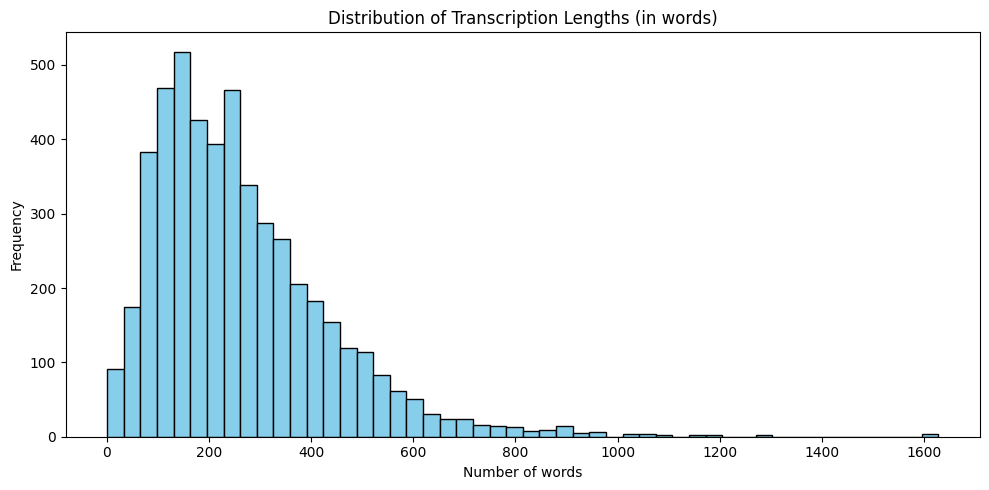

In [12]:
# Transcription Length
# Add a column for text length
df['transcription_length'] = df['clean_transcription'].apply(lambda x: len(x.split()))

# Summary stats
print(df['transcription_length'].describe())

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(df['transcription_length'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Transcription Lengths (in words)")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Feature Engineering (TF-IDF Vectorization)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Encode target labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['medical_specialty'])

# Split data
X = df['clean_transcription']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # bigrams included
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shape (train):", X_train_tfidf.shape)
print("TF-IDF shape (test):", X_test_tfidf.shape)

C:\Users\692364\AppData\Local\Temp\ipykernel_12072\713623345.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = label_encoder.fit_transform(df['medical_specialty'])


TF-IDF shape (train): (3972, 5000)
TF-IDF shape (test): (994, 5000)


# Traditional Models
## Train & Evaluate Naive Bayes and SVM

C:\Program Files\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



 Naive Bayes Evaluation:
Accuracy: 0.35311871227364183

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.44      0.35      0.39        74
           4       0.00      0.00      0.00         3
           5       0.26      0.91      0.41       103
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        22
          11       0.00      0.00      0.00        19
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00         4
          14       0.28      0.11      0.16        45
          15       0.00      0.00      0.00        52


C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


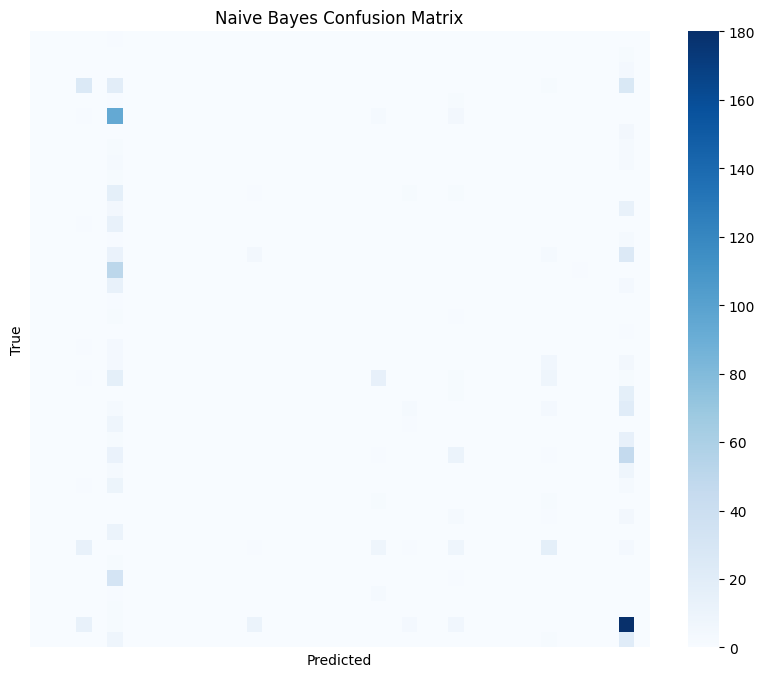


 SVM Evaluation:
Accuracy: 0.09859154929577464

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         4
           3       0.13      0.14      0.13        74
           4       0.00      0.00      0.00         3
           5       0.06      0.07      0.06       103
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         2
          10       0.20      0.14      0.16        22
          11       0.00      0.00      0.00        19
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00         4
          14       0.02      0.02      0.02        45
          15       0.06      0.06      0.06        52
        

C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


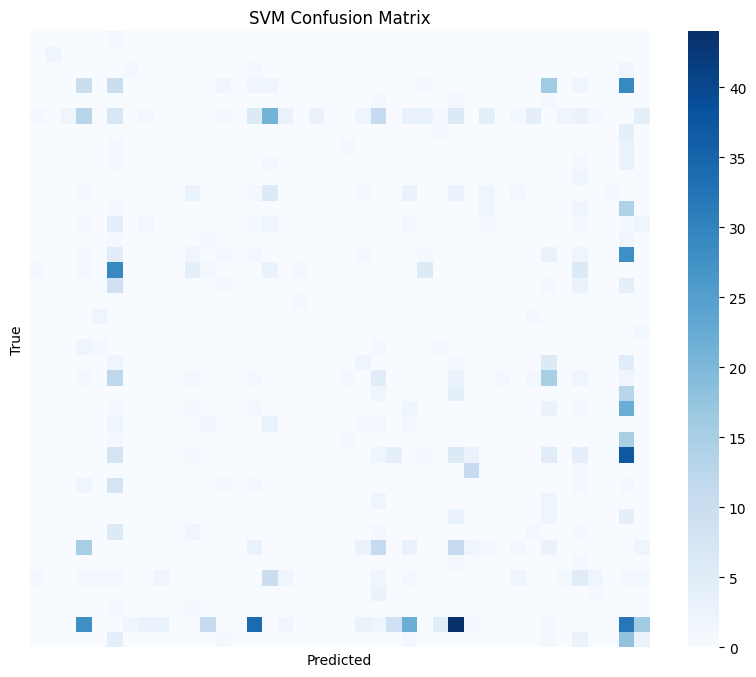

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)

# Support Vector Machine
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n {name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, cmap='Blues', xticklabels=False, yticklabels=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Run evaluations
evaluate_model("Naive Bayes", y_test, nb_preds)
evaluate_model("SVM", y_test, svm_preds)


# Deep Learning Models
## LSTM Model

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
max_len = 300  # based on EDA histogram
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Labels as one-hot
num_classes = len(label_encoder.classes_)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print("Padded shape:", X_train_pad.shape)
print("One-hot label shape:", y_train_cat.shape)


Padded shape: (3972, 300)
One-hot label shape: (3972, 40)


In [16]:
# Build and Train LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Constants
vocab_size = 10000
embedding_dim = 128
max_len = 300
num_classes = len(label_encoder.classes_)

# LSTM Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.build(input_shape=(None, max_len))
model.summary()


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 300, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │           2,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,422,440 (5.43 MB)

 Trainable params: 1,422,440 (5.43 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(
    X_train_pad, y_train_cat,
    validation_data=(X_test_pad, y_test_cat),
    epochs=10,            
    batch_size=32,       
    verbose=1
)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - accuracy: 0.1618 - loss: 3.3273 - val_accuracy: 0.2193 - val_loss: 2.9501
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.2142 - loss: 3.0192 - val_accuracy: 0.2264 - val_loss: 2.9274
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.2513 - loss: 2.9242 - val_accuracy: 0.2374 - val_loss: 2.9172
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.2612 - loss: 2.8729 - val_accuracy: 0.2465 - val_loss: 2.8568
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.2493 - loss: 2.8258 - val_accuracy: 0.2515 - val_loss: 2.8343
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.2579 - loss: 2.7842 - val_accuracy: 0.2485 - val_loss: 2.8327
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.2619 - loss: 2.7496 - val_accuracy: 0.2445 - val_loss: 2.8243
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.2734 - loss: 2.69

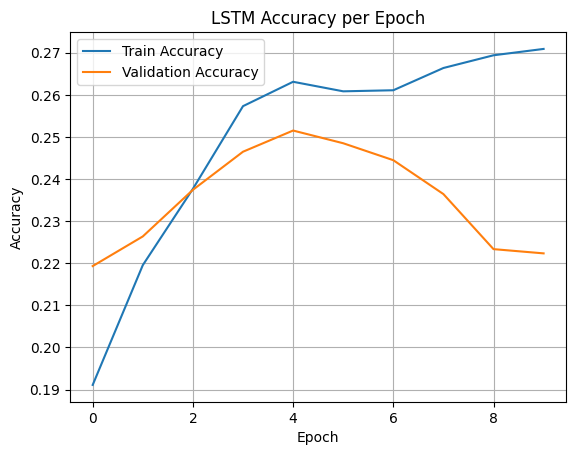

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("LSTM Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Evaluation for LSTM
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_probs = model.predict(X_test_pad)

# Convert one-hot predictions to label indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Classification report
print("LSTM Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
LSTM Classification Report:
                                precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         4
    Cardiovascular / Pulmonary       0.13      0.07      0.09        74
                  Chiropractic       0.00      0.00      0.00         3
    Consult - History and Phy.       0.23      0.20      0.22       103
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         5
                     Dentistry       0.00      0.00      0.00         5
                   Dermatology       0.00      0.00      0.00         6
          Diets and Nutritions       0.00      0.00      0.00         2
             Discharge Summary       0.00      0.00      0.00        22
          ENT - Otolaryngology       0.00      0.00      0.00      

C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


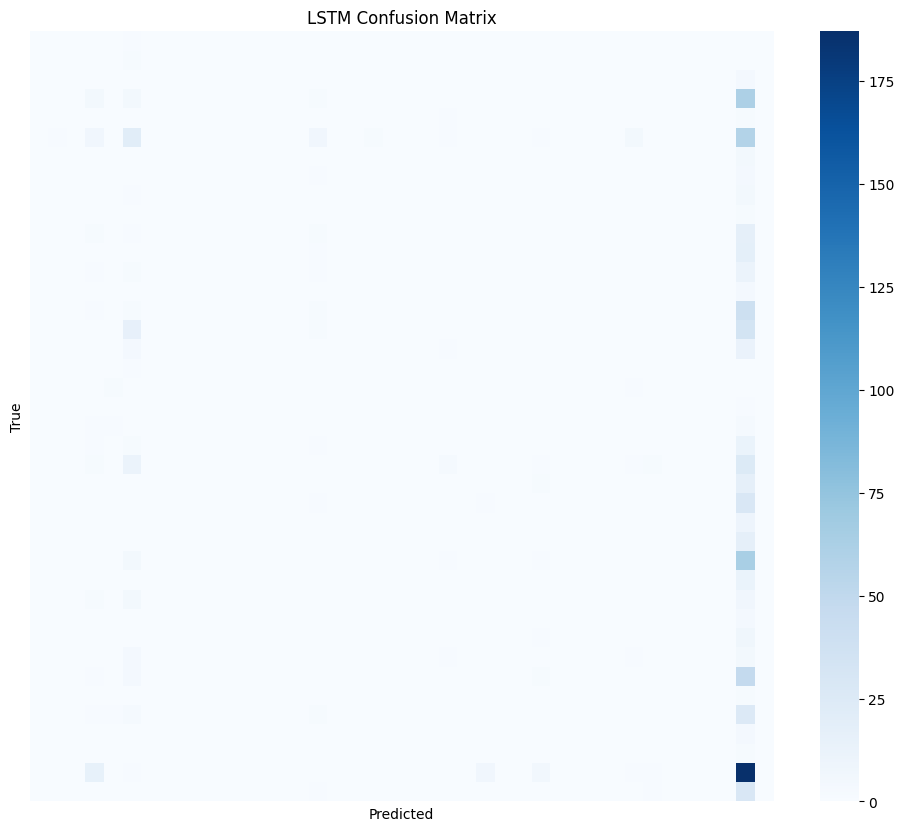

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap="Blues", xticklabels=False, yticklabels=False)
plt.title("LSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Transformer Model 

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, MultiHeadAttention, LayerNormalization, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model

# Input shape
input_seq = Input(shape=(max_len,))  # Already defined earlier

# Embedding Layer
x = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len)(input_seq)

# Self-Attention Block
attn_output = MultiHeadAttention(num_heads=4, key_dim=embedding_dim)(x, x)
attn_output = LayerNormalization(epsilon=1e-6)(attn_output + x)

# Feed-Forward Network
ff = Dense(embedding_dim, activation='relu')(attn_output)
ff = Dropout(0.1)(ff)
ff = Dense(embedding_dim)(ff)
ff = LayerNormalization(epsilon=1e-6)(ff + attn_output)

# Pooling and Classification Output
pooled = GlobalAveragePooling1D()(ff)
output = Dense(num_classes, activation='softmax')(pooled)

# Build Model
transformer_model = Model(inputs=input_seq, outputs=output)

# Compile
transformer_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Summary
print("\nTransformer Model Summary:")
transformer_model.summary()


Transformer Model Summary:


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 300)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_1 (Embedding)       │ (None, 300, 128)          │       1,280,000 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention          │ (None, 300, 128)          │         263,808 │ embedding_1[0][0],         │
│ (MultiHeadAttention)          │                           │                 │ embedding_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 300, 128)          │               0 │ multi_head_attention[0][0… │
│                               │                           │                 │ embedding_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization           │ (None, 300, 128)          │             256 │ add[0][0]                  │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 300, 128)          │          16,512 │ layer_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 300, 128)          │               0 │ dense_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 300, 128)          │          16,512 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_1 (Add)                   │ (None, 300, 128)          │               0 │ dense_3[0][0],             │
│                               │                           │                 │ layer_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_1         │ (None, 300, 128)          │             256 │ add_1[0][0]                │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d      │ (None, 128)               │               0 │ layer_normalization_1[0][… │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 40)                │           5,160 │ global_average_pooling1d[… │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,582,504 (6.04 MB)

 Trainable params: 1,582,504 (6.04 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train
history_transformer = transformer_model.fit(
    X_train_pad, y_train_cat,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - accuracy: 0.2447 - loss: 2.9970 - precision: 0.3452 - recall: 0.0225 - val_accuracy: 0.3191 - val_loss: 2.3811 - val_precision: 0.2857 - val_recall: 0.0201
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 293ms/step - accuracy: 0.3747 - loss: 2.0923 - precision: 0.5138 - recall: 0.0796 - val_accuracy: 0.2789 - val_loss: 2.0792 - val_precision: 0.2931 - val_recall: 0.0854
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 298ms/step - accuracy: 0.4356 - loss: 1.6480 - precision: 0.5072 - recall: 0.1754 - val_accuracy: 0.2714 - val_loss: 2.0711 - val_precision: 0.2451 - val_recall: 0.1256
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 295ms/step - accuracy: 0.4930 - loss: 1.3084 - precision: 0.5390 - recall: 0.2899 - val_accuracy: 0.1985 - val_loss: 2.1601 - val_precision: 0.1840 - val_recall: 0.1156
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 302ms/step - accuracy: 0.5086 - loss: 1.1408 - precision: 0.5634 - recall: 0.3495 - val_accuracy: 0.1709 - val_los

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
Transformer Classification Report:
                                precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       1.00      0.50      0.67         2
                    Bariatrics       0.00      0.00      0.00         4
    Cardiovascular / Pulmonary       0.20      0.22      0.21        74
                  Chiropractic       0.20      0.33      0.25         3
    Consult - History and Phy.       0.11      0.14      0.12       103
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         5
                     Dentistry       0.00      0.00      0.00         5
                   Dermatology       0.00      0.00      0.00         6
          Diets and Nutritions       0.00      0.00      0.00         2
             Discharge Summary       0.29      0.18      0.22        22
          ENT - Otolaryngology       0.08      0.05      0.0

C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


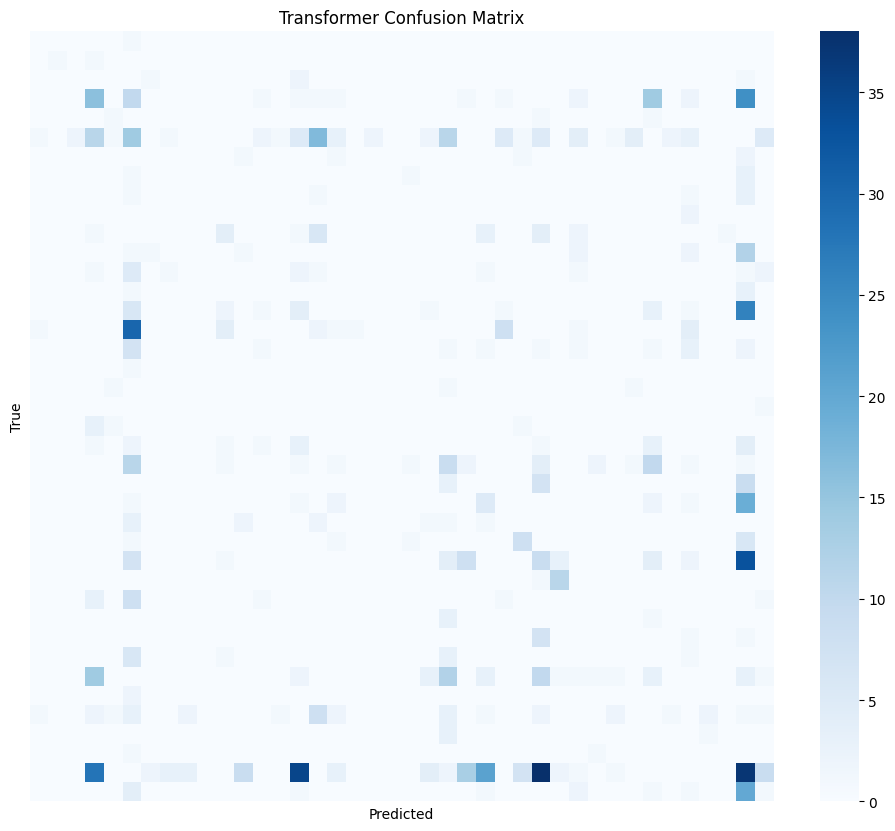

In [23]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class probabilities
y_pred_probs = transformer_model.predict(X_test_pad)

# Convert predictions from probabilities to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Classification Report
print("Transformer Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap="Blues", xticklabels=False, yticklabels=False)
plt.title("Transformer Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Refined Models(Hyperparameter Tuning)

In [24]:
# Refined Naive Bayes with TF-IDF & N-grams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_df=0.8, min_df=2, max_features=10000)),
    ('nb', MultinomialNB())
])

nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)

In [25]:
# Refined SVM (Linear Kernel, Balanced Classes)
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

svm = LinearSVC(class_weight='balanced')
params = {'C': [0.1, 1, 10]}
grid = GridSearchCV(svm, param_grid=params, cv=3, verbose=1)

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=0.8, min_df=2)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

grid.fit(X_train_tfidf, y_train)
y_pred_svm = grid.predict(X_test_tfidf)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Program Files\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn

In [26]:
# Refined LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Build model
lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=False, dropout=0.3, recurrent_dropout=0.3)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

lstm_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train
history_lstm = lstm_model.fit(
    X_train_pad, y_train_cat,
    validation_split=0.1,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/50


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 545ms/step - accuracy: 0.1410 - loss: 3.4460 - val_accuracy: 0.2337 - val_loss: 2.9427 - learning_rate: 0.0010
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 552ms/step - accuracy: 0.2445 - loss: 2.9889 - val_accuracy: 0.2889 - val_loss: 2.7239 - learning_rate: 0.0010
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 554ms/step - accuracy: 0.3111 - loss: 2.6850 - val_accuracy: 0.3241 - val_loss: 2.6114 - learning_rate: 0.0010
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 563ms/step - accuracy: 0.3444 - loss: 2.5194 - val_accuracy: 0.3166 - val_loss: 2.5646 - learning_rate: 0.0010
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 559ms/step - accuracy: 0.3741 - loss: 2.3984 - val_accuracy: 0.2915 - val_loss: 2.4808 - learning_rate: 0.0010
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 565ms/step - accuracy: 0.3751 - loss: 2.2655 - val_accuracy: 0.2889 - val_loss: 2.4879 - learning_rate: 0.0010
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 557ms/step - accuracy: 0.3956 - loss: 2.0829 - val_

In [30]:
# Refined Transformer 
from tensorflow.keras.layers import Input, Embedding, MultiHeadAttention, LayerNormalization, Dense, Dropout, GlobalAveragePooling1D, Add
from tensorflow.keras.models import Model

inputs = Input(shape=(max_len,))
x = Embedding(vocab_size, embedding_dim, input_length=max_len)(inputs)

# Repeat attention block twice
for _ in range(2):
    attn_output = MultiHeadAttention(num_heads=4, key_dim=embedding_dim)(x, x)
    x = Add()([x, attn_output])
    x = LayerNormalization(epsilon=1e-6)(x)
    ff = Dense(embedding_dim, activation='relu')(x)
    ff = Dropout(0.2)(ff)
    ff = Dense(embedding_dim)(ff)
    x = Add()([x, ff])
    x = LayerNormalization(epsilon=1e-6)(x)

# Pooling and output
x = GlobalAveragePooling1D()(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

# Build and compile
transformer_model = Model(inputs=inputs, outputs=output)
transformer_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

history_transformer = transformer_model.fit(
    X_train_pad, y_train_cat,
    validation_split=0.1,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/50


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 635ms/step - accuracy: 0.2098 - loss: 3.0849 - val_accuracy: 0.3417 - val_loss: 2.4138 - learning_rate: 0.0010
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 642ms/step - accuracy: 0.3678 - loss: 2.1740 - val_accuracy: 0.3015 - val_loss: 2.1703 - learning_rate: 0.0010
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 629ms/step - accuracy: 0.4275 - loss: 1.7222 - val_accuracy: 0.2613 - val_loss: 2.0931 - learning_rate: 0.0010
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 626ms/step - accuracy: 0.4775 - loss: 1.3988 - val_accuracy: 0.1935 - val_loss: 2.2223 - learning_rate: 0.0010
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 649ms/step - accuracy: 0.5040 - loss: 1.2529 - val_accuracy: 0.1683 - val_loss: 2.3296 - learning_rate: 0.0010
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 636ms/step - accuracy: 0.5238 - loss: 1.1262 - val_accuracy: 0.1533 - val_loss: 2.5816 - learning_rate: 0.0010
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 632ms/step - accuracy: 0.5515 - loss: 1.0071 - val_

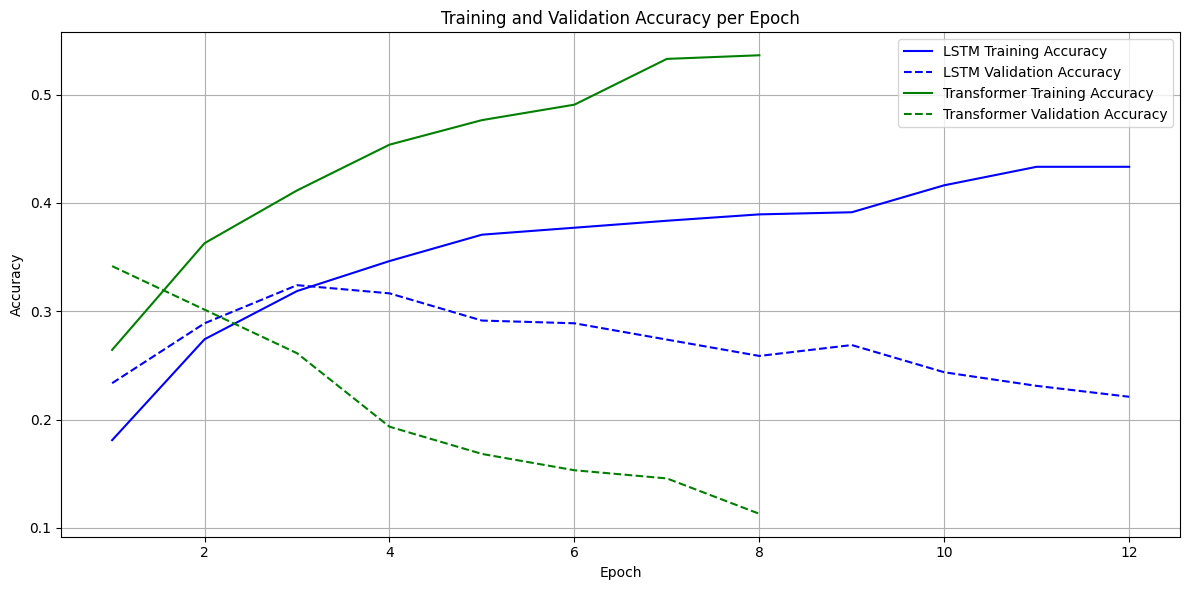

In [31]:
import matplotlib.pyplot as plt

# Extract accuracy history
lstm_acc = history_lstm.history['accuracy']
lstm_val_acc = history_lstm.history['val_accuracy']
transformer_acc = history_transformer.history['accuracy']
transformer_val_acc = history_transformer.history['val_accuracy']

# Create epoch range
epochs_lstm = range(1, len(lstm_acc) + 1)
epochs_transformer = range(1, len(transformer_acc) + 1)

# Plot
plt.figure(figsize=(12, 6))

# LSTM Accuracy
plt.plot(epochs_lstm, lstm_acc, 'b-', label='LSTM Training Accuracy')
plt.plot(epochs_lstm, lstm_val_acc, 'b--', label='LSTM Validation Accuracy')

# Transformer Accuracy
plt.plot(epochs_transformer, transformer_acc, 'g-', label='Transformer Training Accuracy')
plt.plot(epochs_transformer, transformer_val_acc, 'g--', label='Transformer Validation Accuracy')

# Labels and formatting
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Evaluate Refined Models

In [32]:
# Predict and Evaluate Each Model
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd

# Classic models predictions (already trained)
nb_pred = nb_pipeline.predict(X_test)
svm_pred = grid.predict(X_test_tfidf)

# Deep models predictions
lstm_pred = np.argmax(lstm_model.predict(X_test_pad), axis=1)
transformer_pred = np.argmax(transformer_model.predict(X_test_pad), axis=1)

# Ground truth
y_true = np.argmax(y_test_cat, axis=1)

# Metric function
def get_metrics(name, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Macro F1': f1_score(y_true, y_pred, average='macro'),
        'Weighted F1': f1_score(y_true, y_pred, average='weighted')
    }

# Evaluate all models
results = [
    get_metrics("Naive Bayes", nb_pred),
    get_metrics("SVM", svm_pred),
    get_metrics("LSTM", lstm_pred),
    get_metrics("Transformer", transformer_pred)
]

df_results = pd.DataFrame(results)
print(df_results)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step
         Model  Accuracy  Macro F1  Weighted F1
0  Naive Bayes  0.358149  0.055107     0.243815
1          SVM  0.257545  0.348957     0.214291
2         LSTM  0.279678  0.047249     0.207926
3  Transformer  0.248491  0.080417     0.210170


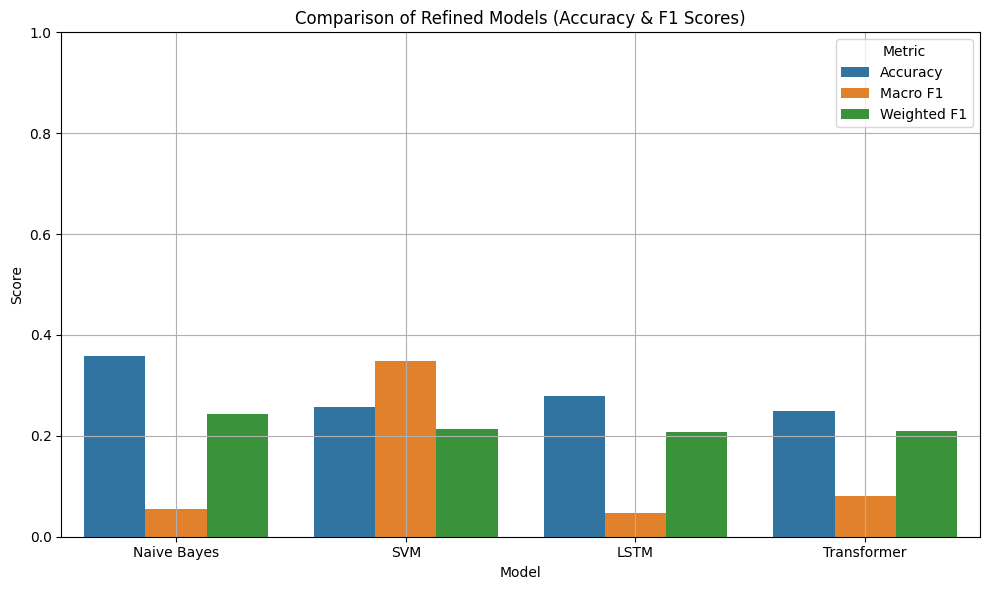

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting setup
plt.figure(figsize=(10, 6))
df_plot = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

sns.barplot(data=df_plot, x='Model', y='Score', hue='Metric')
plt.title("Comparison of Refined Models (Accuracy & F1 Scores)")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


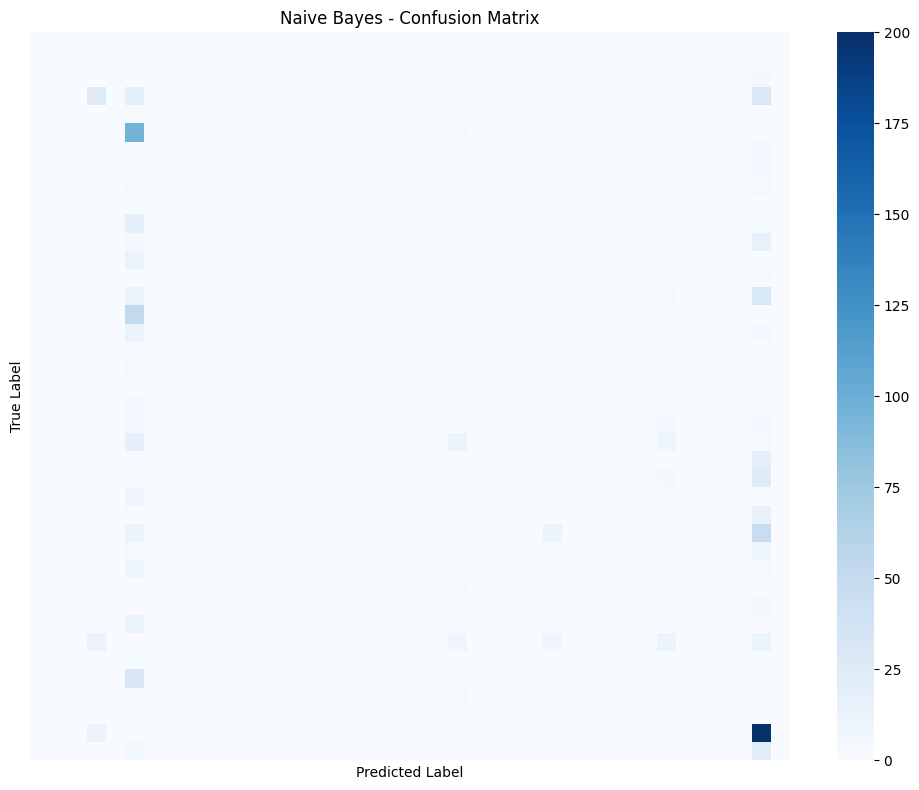

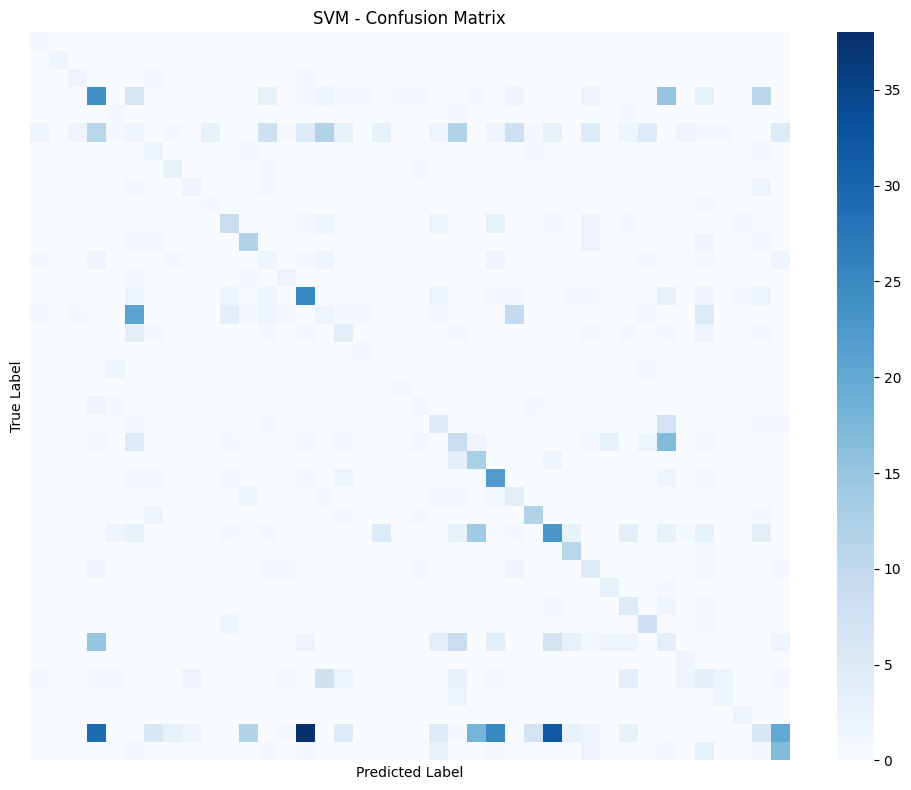

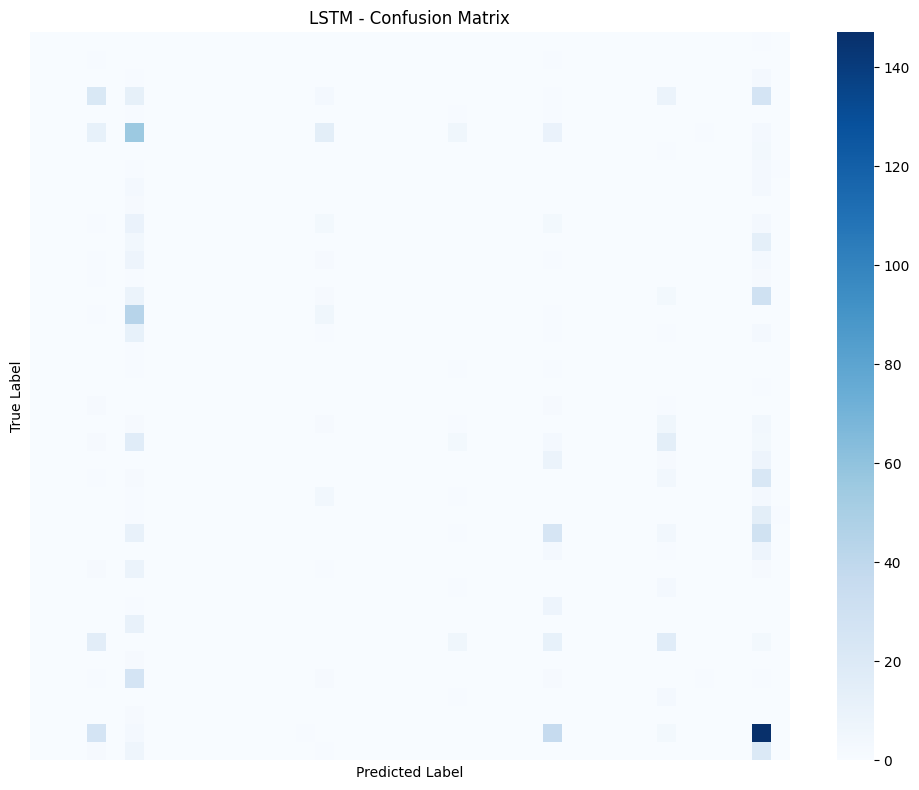

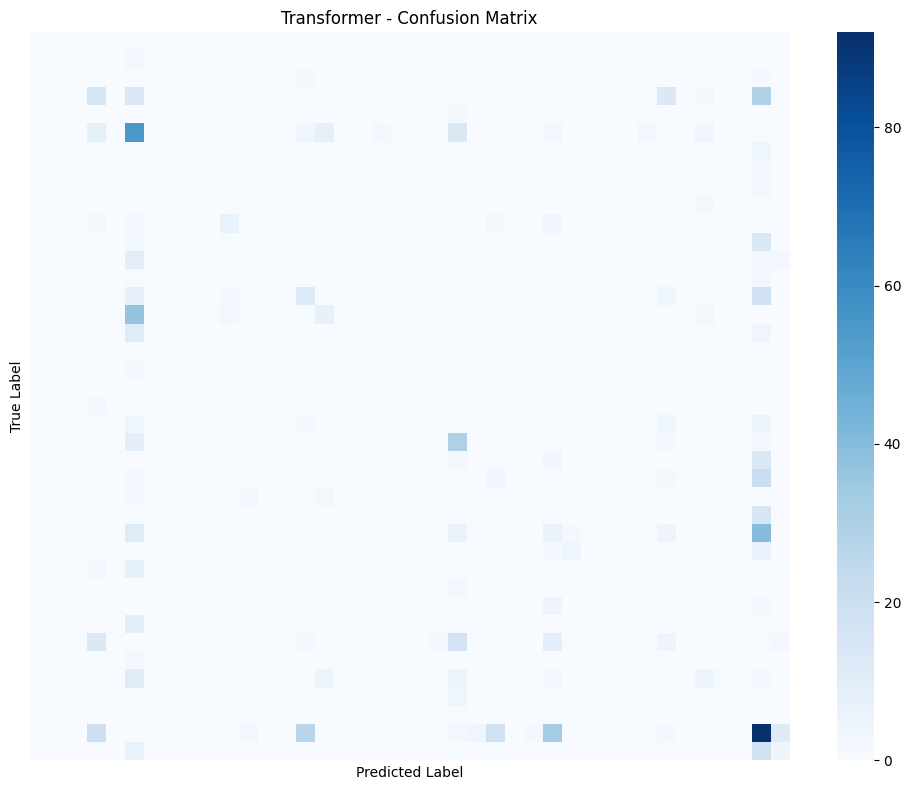

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, cmap='Blues', xticklabels=False, yticklabels=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Naive Bayes
plot_confusion_matrix(y_true, nb_pred, "Naive Bayes")

# SVM
plot_confusion_matrix(y_true, svm_pred, "SVM")

# LSTM
plot_confusion_matrix(y_true, lstm_pred, "LSTM")

# Transformer
plot_confusion_matrix(y_true, transformer_pred, "Transformer")
